In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [ ]:
data = pd.read_csv(path+"/IMDB Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.isna().sum()#no null values

,0
review,0
sentiment,0


In [ ]:
data["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
label_encoder = {'positive': 1, 'negative': 0}
data['sentiment'] = data['sentiment'].map(label_encoder)

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:
data["review"] = data["review"].str.lower()

In [ ]:
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

data['review'] = data['review'].apply(remove_html_tags)

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
data['review'] = data['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production. filming technique...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there's family little boy (jake) thi...,0
4,"petter mattei's ""love time money"" visually stu...",1
...,...,...
49995,thought movie right good job. creative origina...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,catholic taught parochial elementary schools n...,0
49998,going disagree previous comment side maltin on...,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
max_words = 5000  # Vocabulary size
max_len = 100     # Sequence length
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
train_x_seq = tokenizer.texts_to_sequences(X_train)
test_x_seq = tokenizer.texts_to_sequences(X_test)
train_x_padded = pad_sequences(train_x_seq, maxlen=max_len, padding='post', truncating='post')
test_x_padded = pad_sequences(test_x_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
model = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    Bidirectional(LSTM(32, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)), # Removed return_sequences=True
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
history = model.fit(train_x_padded, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 166s 158ms/step - accuracy: 0.7099 - loss: 0.5204 - val_accuracy: 0.8503 - val_loss: 0.3423
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 198s 154ms/step - accuracy: 0.8872 - loss: 0.2854 - val_accuracy: 0.8568 - val_loss: 0.3526
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 155s 155ms/step - accuracy: 0.9198 - loss: 0.2133 - val_accuracy: 0.8376 - val_loss: 0.3703
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 203s 156ms/step - accuracy: 0.9427 - loss: 0.1624 - val_accuracy: 0.8451 - val_loss: 0.4640
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 179s 179ms/step - accuracy: 0.9619 - loss: 0.1178 - val_accuracy: 0.8359 - val_loss: 0.4946


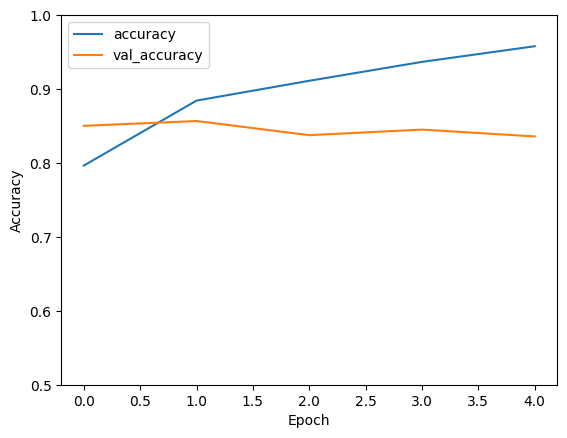

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()

In [ ]:
test_pred = model.predict(test_x_padded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step


In [ ]:
test_pred_labels = np.argmax(test_pred, axis=1)

In [ ]:
test_pred_labels

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
print("\nF1-Score:", f1_score(y_test, test_pred_labels, average=None))
print("\nClassification Report:")
print(classification_report(y_test, test_pred_labels))


F1-Score: [0.83054844 0.838653  ]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      4961
           1       0.83      0.85      0.84      5039

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



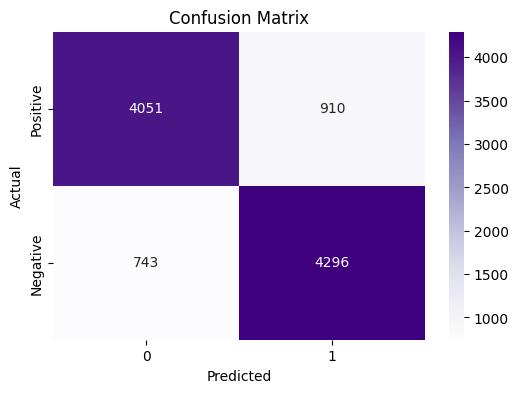

In [ ]:
conf_mat = confusion_matrix(y_test, test_pred_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples', yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=MAX_TOKENS,                  # Limit vocabulary size
    output_mode='int',                      # Output integer sequences
    output_sequence_length=SEQ_LENGTH,       # Pad/truncate to this length
    standardize='lower_and_strip_punctuation' # Lowercase and remove punctuation
)
vectorizer.adapt(train_texts.values)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/twitter-tweets-sentiment-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.23M/1.23M [00:00<00:00, 105MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/twitter-tweets-sentiment-dataset/versions/1


In [ ]:
df = pd.read_csv(path+"/Tweets.csv")

In [ ]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
df.isna().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0


In [ ]:
df.dropna(inplace=True)
display(df.head())

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df["text"] = df["text"].str.lower()

In [ ]:
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

df['text'] = df['text'].apply(remove_html_tags)

In [ ]:
EMOTICON_PATTERN = re.compile(r"""
    (\s|^)          # Start with space or beginning of string
    ([:;xX=]-?[)D(pP\/(])  # Typical emoticons with optional nose (-)
    (\s|$)          # End with space or end of string
""", re.VERBOSE)

In [ ]:
def extract_emoticons(text):
    return [match[1] for match in EMOTICON_PATTERN.findall(text)]

In [ ]:
all_emojis = []
for tweet in df['text']:
    extracted_emojis = extract_emoticons(str(tweet))
    if len(extracted_emojis) > 0:
        all_emojis += extracted_emojis

In [ ]:
all_emojis = set(all_emojis)

In [ ]:
EMOTICON_MAP = {
    ":)": "happyface",
    ":-)": "happyface",

    ":-D": "bigsmile",
    ":D": "bigsmile",
    "=D": "bigsmile",
    "=-D": "bigsmile",

    "xD": "laughingface",
    "XD": "laughingface",


    ":-P": "tongueoutface",
    ":-p": "tongueoutface",
    ":p": "tongueoutface",
     ":P": "tongueoutface",
    "=-P": "tongueoutface",
    "=-p": "tongueoutface",
    "=P": "tongueoutface",
    "=p": "tongueoutface",
    ":-/": "uncertainface",
    ":/": "uncertainface",
    "=-/": "uncertainface",
    "=/": "uncertainface",

    "X)": "grinningface",
    "x)": "grinningface",
    "X-)": "grinningface",
    "x-)": "grinningface",

    "XP": "playfultongueface",
    "xP": "playfultongueface",
    "X-P": "playfultongueface",
    "x-P": "playfultongueface",
     ";p": "winkingtongueoutface",
    ";P": "winkingtongueface",

    ";-)": "winkingface",
    ";)": "winkingface",



    ";D": "bigwinksmile",
    ";-D": "bigwinksmile",

    ";(": "sadwinkingface",
    ";-(": "sadwinkingface",

    ":-(": "sadface",
    "=-(": "sadface",
    ":(": "sadface",
    "=(": "sadface",
}

In [ ]:
def replace_emoticons(text):
    def replace_match(match):
        emoticon = match.group(2)  # Extract only the emoticon part
        return match.group(1) + EMOTICON_MAP.get(emoticon, emoticon) + match.group(3)  # Preserve spacing

    return EMOTICON_PATTERN.sub(replace_match, str(text))

In [ ]:
replace_emoticons('http:// test :p this :) function :( )')

'http:// test tongueoutface this happyface function sadface )'

In [ ]:
df["clean_text"] =  df["text"].apply(replace_emoticons)

In [ ]:
df["clean_text"] = df["clean_text"].replace(",", "").replace(".", "").replace(";", "").replace("!", "")

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


#data['review'] = data['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
negation = {'ain',"aren't","couldn'", "couldn't", "didn", "didn't", "doesn", "doesn't"
            "don", "don't", "hadn", "hadn't", 'hasn', "hasn't", "haven", "haven't", 'isn',
            "isn't", "not", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn',
            "wouldn't"}

In [ ]:
stop_words = stop_words - negation
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [ ]:
df['clean_text']

,clean_text
0,"i`d responded, going"
1,sooo sad miss san diego!!!
2,boss bullying me...
3,interview! leave alone
4,"sons ****, couldn`t put releases already bought"
...,...
27476,wish could come see u denver husband lost job ...
27477,i`ve wondered rake to. client made clear .net ...
27478,yay good you. enjoy break - probably need hect...
27479,worth ****.


In [ ]:
label_encoder = {'positive': 2, 'negative': 0 , 'neutral' : 1} # negative to 0, neutral to 1 and positive to 2
df['sentiment'] = df['sentiment'].map(label_encoder)
display(df.head())

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going",1,"i`d responded, going"
1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD,0,sooo sad miss san diego!!!
2,088c60f138,my boss is bullying me...,bullying me,0,boss bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,0,interview! leave alone
4,358bd9e861,"sons of ****, why couldn`t they put them on t...","Sons of ****,",0,"sons ****, couldn`t put releases already bought"


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
max_words = 5500  # Vocabulary size
max_len = 100     # Sequence length
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
train_x_seq = tokenizer.texts_to_sequences(X_train)
test_x_seq = tokenizer.texts_to_sequences(X_test)
train_x_padded = pad_sequences(train_x_seq, maxlen=max_len, padding='post', truncating='post')
test_x_padded = pad_sequences(test_x_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
from tensorflow.keras.layers import GRU
model1 = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    #Bidirectional(LSTM(32,return_sequences=True)), # Removed return_sequences=True
    #Dropout(0.5),
    #Bidirectional(LSTM(32)),
    GRU(64, return_sequences=True),
    Dropout(0.4),
    GRU(64),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam

model1.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
history = model1.fit(train_x_padded, y_train, epochs=6, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/6
550/550 ━━━━━━━━━━━━━━━━━━━━ 93s 157ms/step - accuracy: 0.3963 - loss: 1.0965 - val_accuracy: 0.4094 - val_loss: 1.0844
Epoch 2/6
 45/550 ━━━━━━━━━━━━━━━━━━━━ 1:21 161ms/step - accuracy: 0.4016 - loss: 1.0902

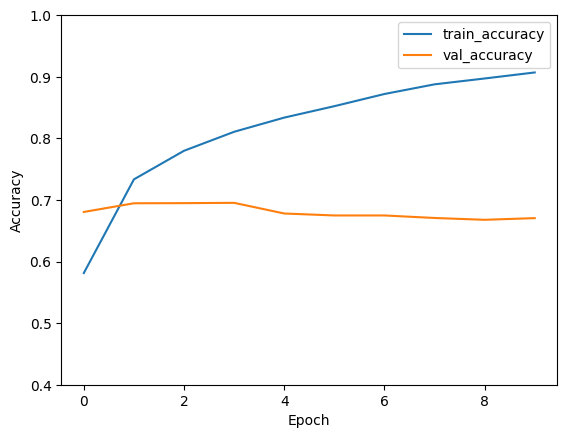

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend()

In [ ]:
y_pred_prob = model1.predict(test_x_padded)
y_pred = y_pred_prob.argmax(axis=1)
#y_true = y_test.argmax(axis=1)

172/172 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step


In [ ]:
print("\nF1-Score:", f1_score(y_test, y_pred , average=None))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


F1-Score: [0.63938789 0.66064299 0.73194918]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.61      0.64      1572
           1       0.62      0.70      0.66      2236
           2       0.77      0.70      0.73      1688

    accuracy                           0.68      5496
   macro avg       0.69      0.67      0.68      5496
weighted avg       0.68      0.68      0.68      5496



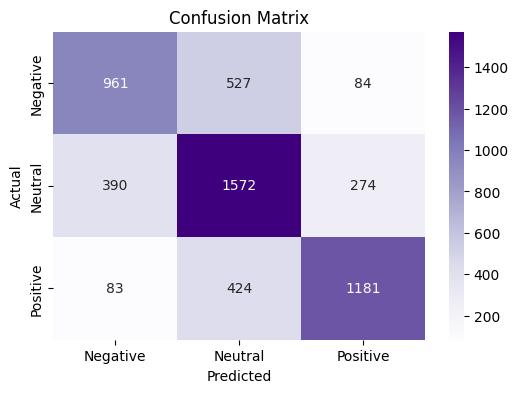

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples',xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative','Neutral','Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()